## Predicting Fahrenheit from Celsius: A Simple TensorFlow Regression
This notebook demonstrates a fundamental machine learning project: building a simple regression model with TensorFlow to convert Celsius to Fahrenheit. It's a hands-on introduction to a complete ML workflow.

We'll cover:
- Data Generation: Creating our dataset using the Celsius to Fahrenheit formula.
- Data Visualization: Using Seaborn to plot the relationship.
- Model Building & Training: Constructing and training a basic TensorFlow 2.19.0 sequential model.
- Loss Monitoring: Visualizing training loss over epochs.
- Prediction & Evaluation: Testing the trained model's accuracy.

Required Libraries:
- tensorflow==2.19.0
- numpy==2.2.6
- seaborn==2.1.3

Let's get started!

## 1. Import Libraries

In [48]:
import numpy as np
import tensorflow  as tf
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Create Training Dataset

In [ ]:
# Generating Training Data with 1000 data points
X_train = np.random.randint(0,1000000,size=1000)
y_train = X_train*(9/5) + 32

# Checking Training Data Shape
X_train.shape,  y_train.shape

((1000,), (1000,))

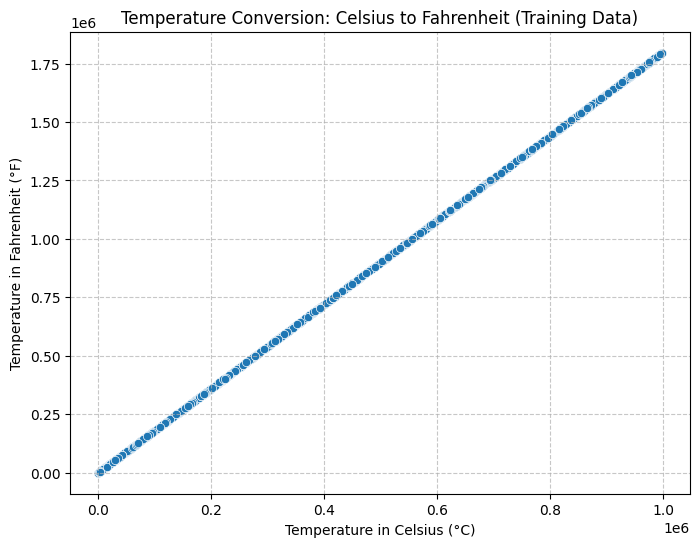

In [ ]:
# Visualize the training data
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=X_train, y=y_train)
plt.title('Temperature Conversion: Celsius to Fahrenheit (Training Data)')
plt.xlabel('Temperature in Celsius (°C)')
plt.ylabel('Temperature in Fahrenheit (°F)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 3.  Build and Train Model

In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary();

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.9),loss="mean_squared_error")
epochs_hist  = model.fit(X_train, y_train, epochs=100,verbose=0)

## 4. Model Training Summary

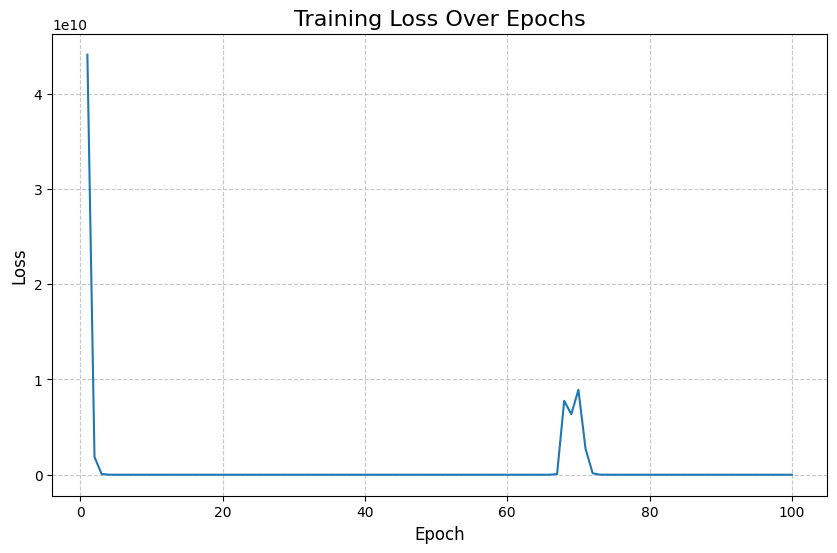

In [56]:
plt.figure(figsize=(10, 6)) 
sns.lineplot(x=range(1, len(epochs_hist.history['loss']) + 1), y=epochs_hist.history['loss'])
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [57]:
model.weights

[<Variable path=sequential_2/dense_2/kernel, shape=(1, 1), dtype=float32, value=[[1.8000513]]>,
 <Variable path=sequential_2/dense_2/bias, shape=(1,), dtype=float32, value=[9.918487]>]

## 5. Test Model

In [60]:
# Input to model, temp. in degree celcius
c_test = 500

# Predict the temperature
c_test = np.array([c_test]) 
y_pred = model.predict(np.array(c_test))
y_pred = model.predict([c_test])

# Print Results
print(f"The Actual Temp. in F is {(c_test*1.8 + 32)[0]:0.2f}.")
print(f"The Predicted Temp. in F is {y_pred[0][0]:0.2f}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The Actual Temp. in F is 932.00.
The Predicted Temp. in F is 909.94.
